<a href="https://colab.research.google.com/github/scudilio/CursoDDS/blob/main/M%C3%B3dulo_4_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## Importação dos dados

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados.shape

(1338, 7)

## EDA Básica

In [ ]:
!pip install sweetviz # instalando biblioteca de visualização

In [ ]:
import sweetviz #importando biblioteca

In [ ]:
eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat = "charges")
eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Algum pré-processamento interessante antes de prosseguir: 

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.**

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## Gráficos pertinentes

In [ ]:
import seaborn as sns

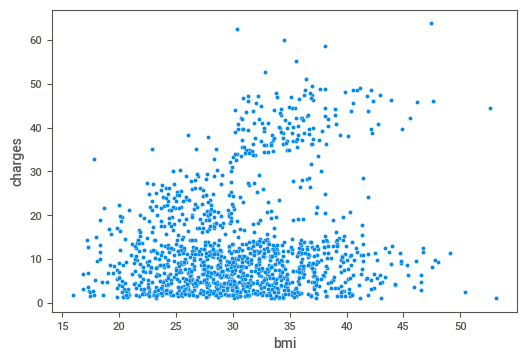

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

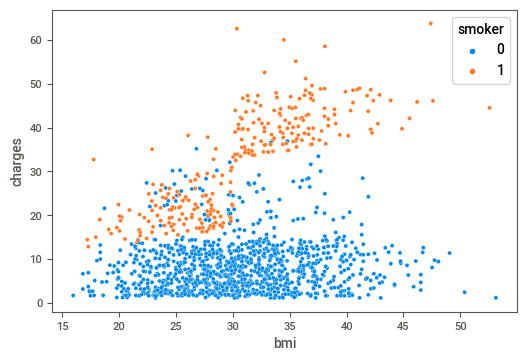

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## Cenário 1: considerando apenas a variável **bmi**.

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 


Preparação para a validação do tipo Holdout

In [ ]:
# Holdout
# Separando em dados teste e treinamento 

from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.26)

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(990, 1)
(348, 1)


In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yteste

1081     4.454403
280     22.331567
1088     9.748911
518      5.240765
693      2.352968
          ...    
1160     7.727253
138     27.322734
644     18.806145
817      3.597596
1280     8.283681
Name: charges, Length: 348, dtype: float64

In [ ]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)
preditos

array([12.1357959 , 12.26244784, 20.98143388, 13.542299  , 10.27823415,
       19.95488659, 15.72426747, 14.0400189 , 13.74005378, 11.00926024,
       10.53153802, 13.86670572, 13.74671967, 11.1225804 , 15.72426747,
       12.62240598, 14.16222691,  8.34290366, 13.02235947, 13.89336928,
       15.09100778, 17.76403026, 16.04423026, 11.41810159, 11.14257807,
       16.39974448, 12.34688246, 13.84448608, 10.32045146, 20.5192654 ,
       10.36266877,  7.4496742 , 18.72169667, 14.7954866 , 13.10679409,
       14.33109616, 17.70848117, 12.4735344 , 12.4735344 , 12.64240365,
       16.1464406 , 23.37671088, 16.1464406 , 11.29144965, 13.86670572,
       13.45342045, 13.64895326, 12.34688246,  9.94049564, 12.60018634,
       12.37798996, 12.13357394, 11.40032588, 12.89570753, 13.78227109,
       13.72005611,  9.0094928 , 16.65304835,  9.27612846,  7.49189151,
       10.42266179, 13.95114034, 14.66883466, 16.19087988, 13.09790624,
       16.39974448, 16.65304835, 10.57375533, 12.07580288, 17.70

In [ ]:
import numpy as np
np.mean((preditos - yteste)**2)

137.7850778142893

In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 137.79


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)


Intercepto: 
 -0.23387669578126946
Coeficientes: 
 [0.44439276]


Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

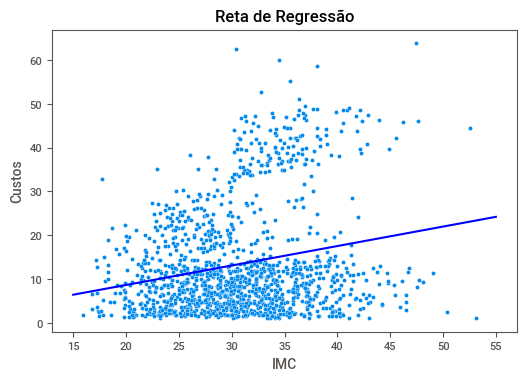

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustassemos e avaliassemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [ ]:
reg0 = LinearRegression()
reg0.fit(X, y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78


---

## Cenário 2: considerando a variável **bmi** e **smoker**.

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 50.8


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -3.908003766806967
Coeficientes: 
 [ 0.40561716 23.5146413 ]


In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

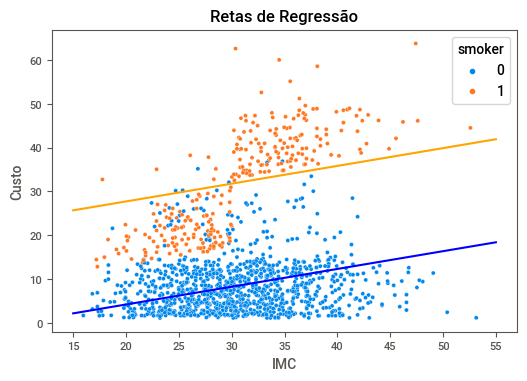

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

## **Exercício**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.